In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('./datasets/df_all_0629.csv')
#df.drop('건물연식',axis=1,inplace=True)
# Train : 2016-2020
# Test : 2021-2022

df['계약일'] = pd.to_datetime(df['계약일'])
train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']
# Train Split
# feature & target  split
X_train_df = train_df.drop('물건금액(만원)', axis=1)
y = train_df['물건금액(만원)']
# X_train : 숫자형 컬럼만 
X_train = X_train_df.select_dtypes([np.number])

# Test Split
# feature & target  split
X_test_df = test_df.drop('물건금액(만원)', axis=1)
y_test = test_df['물건금액(만원)']
# X_test : 숫자형 컬럼만 
X_test = X_test_df.select_dtypes([np.number])

# minMax
from sklearn.preprocessing import MinMaxScaler

# Scaler 객체 생성
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# y -> log 변환

# Train
y_scaled = np.log10(y)
# y_scaled

# Test
y_test_scaled = np.log10(y_test)

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(X_scaled):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_scaled.values,i)
                         for i in range(X_scaled.shape[1])]
    vif["Feature"] = X_scaled.columns
    return vif


# OLS - Scaling 후

## R_OLS_1

In [3]:
# R_OLS_1
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453151
Method:                          IRLS   Df Model:                           18
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:36:55                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5771      0.008    580.938      0.000       4.562       4.593
건물면적(㎡)               2.2120      0.004    602.108      0.000       2.205       2.219
층                     0.2673      0.003     84.504      0.000       0.261       0.273
KOSPI종가               0.0123      0.006      2.014      0.044       0.000       0.024
Fed기준금리              -0.1422      0.004    -40.556      0.000      -0.149      -0.135
국제유가(Dubai)($/배럴)     0.1405      0.004     39.263      0.000       0.134       0.148
부동산거래량                0.0193      0.002      9.995      0.000       0.015       0.023
국고채5년(평균)            -0.3528      0.019    -18.741      0.000      -0.390      -0.316
국고채10년(평균)            0.2915      0.014     21.320      0.000       0.265       0.318
회사채3년(평균)             0.1260      0.006     22.128      0.000       0.115       0.137
CD91물(평균)            -0.0426      0.008     -5.163      0.000      -0.059      -0.026
BOK기준금리              -0.0790      0.007    -11.348      0.000      -0.093      -0.065
건물연식                 -0.0657      0.002    -38.594      0.000      -0.069      -0.062
GDP대비가계부채비율          -0.0122      0.005     -2.549      0.011      -0.022      -0.003
환율종가                  0.0191      0.003      6.166      0.000       0.013       0.025
선행지수순환변동치             0.1336      0.005     29.273      0.000       0.125       0.143
EPU                  -0.0091      0.002     -4.765      0.000      -0.013      -0.005
장단기금리spread          -0.2305      0.009    -26.413      0.000      -0.248      -0.213
LTV                  -0.2764      0.002   -133.631      0.000      -0.280      -0.272
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_1

In [4]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

     VIF_Factor            Feature
0      6.306387            건물면적(㎡)
1      5.095267                  층
2    132.318389            KOSPI종가
3     46.884697            Fed기준금리
4     65.037700  국제유가(Dubai)($/배럴)
5     10.593396             부동산거래량
6   1146.036349          국고채5년(평균)
7    777.403477         국고채10년(평균)
8    125.211249          회사채3년(평균)
9    277.207020          CD91물(평균)
10   253.437203            BOK기준금리
11     5.607164               건물연식
12    60.054603        GDP대비가계부채비율
13    27.231326               환율종가
14   117.980758          선행지수순환변동치
15     5.521824                EPU
16   204.236396        장단기금리spread
17    27.177581                LTV


### 국고채5년(평균) 컬럼 삭제

In [5]:
X_scaled.drop('국고채5년(평균)', axis=1, inplace=True)

## R_OLS_2

In [6]:
# R_OLS_2
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453152
Method:                          IRLS   Df Model:                           17
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:39:16                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6409      0.007    651.802      0.000       4.627       4.655
건물면적(㎡)               2.2128      0.004    602.282      0.000       2.206       2.220
층                     0.2671      0.003     84.457      0.000       0.261       0.273
KOSPI종가               0.0030      0.006      0.499      0.618      -0.009       0.015
Fed기준금리              -0.1562      0.003    -45.649      0.000      -0.163      -0.149
국제유가(Dubai)($/배럴)     0.1429      0.004     39.942      0.000       0.136       0.150
부동산거래량                0.0211      0.002     10.935      0.000       0.017       0.025
국고채10년(평균)            0.0919      0.008     10.892      0.000       0.075       0.108
회사채3년(평균)             0.0940      0.005     17.250      0.000       0.083       0.105
CD91물(평균)            -0.1022      0.008    -13.328      0.000      -0.117      -0.087
BOK기준금리              -0.1358      0.006    -21.659      0.000      -0.148      -0.123
건물연식                 -0.0656      0.002    -38.570      0.000      -0.069      -0.062
GDP대비가계부채비율           0.0011      0.005      0.240      0.810      -0.008       0.010
환율종가                  0.0414      0.003     14.398      0.000       0.036       0.047
선행지수순환변동치             0.1459      0.005     32.362      0.000       0.137       0.155
EPU                  -0.0159      0.002     -8.551      0.000      -0.020      -0.012
장단기금리spread          -0.3367      0.007    -50.596      0.000      -0.350      -0.324
LTV                  -0.2698      0.002   -132.072      0.000      -0.274      -0.266
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### GDP대비가계부채비율 컬럼 삭제

In [7]:
X_scaled.drop('GDP대비가계부채비율', axis=1, inplace=True)

### R_OLS_3

In [8]:
# R_OLS_3
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453153
Method:                          IRLS   Df Model:                           16
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:40:19                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6417      0.006    761.746      0.000       4.630       4.654
건물면적(㎡)               2.2127      0.004    604.033      0.000       2.206       2.220
층                     0.2671      0.003     84.463      0.000       0.261       0.273
KOSPI종가               0.0033      0.006      0.560      0.575      -0.008       0.015
Fed기준금리              -0.1559      0.003    -49.619      0.000      -0.162      -0.150
국제유가(Dubai)($/배럴)     0.1430      0.004     40.439      0.000       0.136       0.150
부동산거래량                0.0211      0.002     10.977      0.000       0.017       0.025
국고채10년(평균)            0.0918      0.008     10.913      0.000       0.075       0.108
회사채3년(평균)             0.0943      0.005     18.035      0.000       0.084       0.105
CD91물(평균)            -0.1023      0.008    -13.381      0.000      -0.117      -0.087
BOK기준금리              -0.1366      0.005    -26.216      0.000      -0.147      -0.126
건물연식                 -0.0656      0.002    -38.564      0.000      -0.069      -0.062
환율종가                  0.0414      0.003     14.417      0.000       0.036       0.047
선행지수순환변동치             0.1458      0.005     32.396      0.000       0.137       0.155
EPU                  -0.0159      0.002     -8.550      0.000      -0.020      -0.012
장단기금리spread          -0.3370      0.007    -51.760      0.000      -0.350      -0.324
LTV                  -0.2700      0.002   -144.426      0.000      -0.274      -0.266
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### KOSPI종가 컬럼 삭제

In [9]:
X_scaled.drop('KOSPI종가', axis=1, inplace=True)

## R_OLS_4

In [10]:
# R_OLS_4
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453154
Method:                          IRLS   Df Model:                           15
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:41:18                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6439      0.005    989.034      0.000       4.635       4.653
건물면적(㎡)               2.2126      0.004    604.537      0.000       2.205       2.220
층                     0.2671      0.003     84.458      0.000       0.261       0.273
Fed기준금리              -0.1557      0.003    -49.803      0.000      -0.162      -0.150
국제유가(Dubai)($/배럴)     0.1432      0.004     40.676      0.000       0.136       0.150
부동산거래량                0.0214      0.002     11.455      0.000       0.018       0.025
국고채10년(평균)            0.0918      0.008     10.920      0.000       0.075       0.108
회사채3년(평균)             0.0955      0.005     19.822      0.000       0.086       0.105
CD91물(평균)            -0.1036      0.007    -14.247      0.000      -0.118      -0.089
BOK기준금리              -0.1364      0.005    -26.239      0.000      -0.147      -0.126
건물연식                 -0.0656      0.002    -38.561      0.000      -0.069      -0.062
환율종가                  0.0409      0.003     15.185      0.000       0.036       0.046
선행지수순환변동치             0.1471      0.004     37.870      0.000       0.140       0.155
EPU                  -0.0160      0.002     -8.641      0.000      -0.020      -0.012
장단기금리spread          -0.3384      0.006    -55.787      0.000      -0.350      -0.327
LTV                  -0.2704      0.002   -157.162      0.000      -0.274      -0.267
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_4

In [11]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.257003            건물면적(㎡)
1     5.047221                  층
2    38.090221            Fed기준금리
3    60.642650  국제유가(Dubai)($/배럴)
4     9.792472             부동산거래량
5   113.113791         국고채10년(평균)
6    64.633186          회사채3년(평균)
7   248.815837          CD91물(평균)
8   171.410824            BOK기준금리
9     5.484592               건물연식
10   15.535245               환율종가
11   57.042505          선행지수순환변동치
12    5.384545                EPU
13  143.309097        장단기금리spread
14   21.293594                LTV


### CD91물(평균) 컬럼 삭제

In [12]:
X_scaled.drop('CD91물(평균)', axis=1, inplace=True)

## R_OLS_5

In [13]:
# R_OLS_5
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453155
Method:                          IRLS   Df Model:                           14
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:43:10                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6106      0.004   1137.160      0.000       4.603       4.619
건물면적(㎡)               2.2120      0.004    604.091      0.000       2.205       2.219
층                     0.2670      0.003     84.392      0.000       0.261       0.273
Fed기준금리              -0.1626      0.003    -52.497      0.000      -0.169      -0.157
국제유가(Dubai)($/배럴)     0.1465      0.004     41.658      0.000       0.140       0.153
부동산거래량                0.0199      0.002     10.679      0.000       0.016       0.024
국고채10년(평균)            0.0126      0.006      2.004      0.045       0.000       0.025
회사채3년(평균)             0.1306      0.004     31.328      0.000       0.122       0.139
BOK기준금리              -0.1893      0.004    -52.128      0.000      -0.196      -0.182
건물연식                 -0.0654      0.002    -38.460      0.000      -0.069      -0.062
환율종가                  0.0427      0.003     15.858      0.000       0.037       0.048
선행지수순환변동치             0.1822      0.003     59.869      0.000       0.176       0.188
EPU                  -0.0153      0.002     -8.271      0.000      -0.019      -0.012
장단기금리spread          -0.3284      0.006    -54.572      0.000      -0.340      -0.317
LTV                  -0.2733      0.002   -159.493      0.000      -0.277      -0.270
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

In [14]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.214780            건물면적(㎡)
1     5.015794                  층
2    37.406993            Fed기준금리
3    60.560684  국제유가(Dubai)($/배럴)
4     9.559719             부동산거래량
5    85.286861         국고채10년(평균)
6    58.104693          회사채3년(평균)
7    43.412219            BOK기준금리
8     5.439592               건물연식
9    13.955629               환율종가
10   44.465921          선행지수순환변동치
11    5.371043                EPU
12  141.511637        장단기금리spread
13   20.288231                LTV


### 장단기금리spread 컬럼 삭제

In [15]:
X_scaled.drop('장단기금리spread', axis=1, inplace=True)

## R_OLS_6

In [16]:
# R_OLS_6
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453156
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:44:42                                         
No. Iterations:                    50                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.5160      0.004   1225.711      0.000       4.509       4.523
건물면적(㎡)               2.2144      0.004    602.173      0.000       2.207       2.222
층                     0.2686      0.003     84.532      0.000       0.262       0.275
Fed기준금리              -0.1068      0.003    -36.428      0.000      -0.113      -0.101
국제유가(Dubai)($/배럴)     0.0970      0.003     28.431      0.000       0.090       0.104
부동산거래량               -0.0047      0.002     -2.582      0.010      -0.008      -0.001
국고채10년(평균)           -0.1508      0.006    -27.141      0.000      -0.162      -0.140
회사채3년(평균)             0.0511      0.004     13.013      0.000       0.043       0.059
BOK기준금리              -0.0841      0.003    -27.228      0.000      -0.090      -0.078
건물연식                 -0.0623      0.002    -36.460      0.000      -0.066      -0.059
환율종가                  0.0489      0.003     18.109      0.000       0.044       0.054
선행지수순환변동치             0.1230      0.003     43.065      0.000       0.117       0.129
EPU                  -0.0225      0.002    -12.097      0.000      -0.026      -0.019
LTV                  -0.2550      0.002   -151.219      0.000      -0.258      -0.252
=====================================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_6

In [17]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor            Feature
0     6.187546            건물면적(㎡)
1     4.994919                  층
2    32.638293            Fed기준금리
3    51.945788  국제유가(Dubai)($/배럴)
4     8.296716             부동산거래량
5    78.412069         국고채10년(평균)
6    37.073963          회사채3년(평균)
7    37.724184            BOK기준금리
8     5.415967               건물연식
9    12.674660               환율종가
10   27.191444          선행지수순환변동치
11    5.260038                EPU
12   20.086495                LTV


### 국제유가(Dubai)($/배럴) 컬럼 삭제

In [18]:
X_scaled.drop('국제유가(Dubai)($/배럴)', axis=1, inplace=True)

## R_OLS_7

In [19]:
# R_OLS_7
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453157
Method:                          IRLS   Df Model:                           12
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:45:49                                         
No. Iterations:                    27                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5520      0.003   1310.738      0.000       4.545       4.559
건물면적(㎡)        2.2161      0.004    602.211      0.000       2.209       2.223
층              0.2685      0.003     84.414      0.000       0.262       0.275
Fed기준금리       -0.0556      0.002    -23.925      0.000      -0.060      -0.051
부동산거래량         0.0103      0.002      5.981      0.000       0.007       0.014
국고채10년(평균)    -0.1411      0.006    -25.451      0.000      -0.152      -0.130
회사채3년(평균)      0.0618      0.004     15.761      0.000       0.054       0.069
BOK기준금리       -0.0885      0.003    -28.647      0.000      -0.095      -0.082
건물연식          -0.0624      0.002    -36.496      0.000      -0.066      -0.059
환율종가           0.0120      0.002      5.045      0.000       0.007       0.017
선행지수순환변동치      0.1136      0.003     40.000      0.000       0.108       0.119
EPU           -0.0070      0.002     -3.953      0.000      -0.011      -0.004
LTV           -0.2543      0.002   -150.689      0.000      -0.258      -0.251
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_7

In [20]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

    VIF_Factor     Feature
0     6.150507     건물면적(㎡)
1     4.977729           층
2    20.716206     Fed기준금리
3     6.400098      부동산거래량
4    75.755834  국고채10년(평균)
5    31.243572   회사채3년(평균)
6    36.044477     BOK기준금리
7     5.390415        건물연식
8    11.092390        환율종가
9    26.729391   선행지수순환변동치
10    4.478959         EPU
11   19.946091         LTV


### 국고채10년(평균) 컬럼 삭제

In [21]:
X_scaled.drop('국고채10년(평균)', axis=1, inplace=True)

## R_OLS_8

In [22]:
# R_OLS_8
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453158
Method:                          IRLS   Df Model:                           11
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:46:39                                         
No. Iterations:                    28                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6083      0.003   1716.800      0.000       4.603       4.614
건물면적(㎡)        2.2143      0.004    601.322      0.000       2.207       2.222
층              0.2684      0.003     84.304      0.000       0.262       0.275
Fed기준금리       -0.0635      0.002    -27.526      0.000      -0.068      -0.059
부동산거래량         0.0079      0.002      4.549      0.000       0.004       0.011
회사채3년(평균)     -0.0307      0.002    -20.402      0.000      -0.034      -0.028
BOK기준금리       -0.1384      0.002    -57.826      0.000      -0.143      -0.134
건물연식          -0.0621      0.002    -36.268      0.000      -0.065      -0.059
환율종가          -0.0044      0.002     -1.910      0.056      -0.009       0.000
선행지수순환변동치      0.0593      0.002     31.775      0.000       0.056       0.063
EPU           -0.0163      0.002     -9.353      0.000      -0.020      -0.013
LTV           -0.2643      0.002   -160.702      0.000      -0.268      -0.261
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### 환율종가 컬럼 삭제

In [23]:
X_scaled.drop('환율종가', axis=1, inplace=True)

## R_OLS_9

In [24]:
# R_OLS_9
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453159
Method:                          IRLS   Df Model:                           10
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:47:15                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6054      0.002   2081.217      0.000       4.601       4.610
건물면적(㎡)        2.2143      0.004    601.338      0.000       2.207       2.222
층              0.2683      0.003     84.295      0.000       0.262       0.275
Fed기준금리       -0.0638      0.002    -27.663      0.000      -0.068      -0.059
부동산거래량         0.0081      0.002      4.675      0.000       0.005       0.011
회사채3년(평균)     -0.0305      0.002    -20.345      0.000      -0.033      -0.028
BOK기준금리       -0.1375      0.002    -58.478      0.000      -0.142      -0.133
건물연식          -0.0621      0.002    -36.294      0.000      -0.065      -0.059
선행지수순환변동치      0.0613      0.002     38.717      0.000       0.058       0.064
EPU           -0.0171      0.002    -10.070      0.000      -0.020      -0.014
LTV           -0.2648      0.002   -162.830      0.000      -0.268      -0.262
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_9

In [25]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.885305    건물면적(㎡)
1    4.734377          층
2   20.446177    Fed기준금리
3    4.581192     부동산거래량
4    7.476192  회사채3년(평균)
5   30.605903    BOK기준금리
6    4.996571       건물연식
7   13.982702  선행지수순환변동치
8    3.458880        EPU
9   18.471842        LTV


### BOK기준금리 컬럼 삭제

In [26]:
X_scaled.drop('BOK기준금리', axis=1, inplace=True)

## R_OLS_10

In [27]:
# R_OLS_10
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453160
Method:                          IRLS   Df Model:                            9
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:48:21                                         
No. Iterations:                    50                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5613      0.002   2179.131      0.000       4.557       4.565
건물면적(㎡)        2.2000      0.004    593.997      0.000       2.193       2.207
층              0.2689      0.003     83.827      0.000       0.263       0.275
Fed기준금리       -0.1732      0.001   -125.682      0.000      -0.176      -0.171
부동산거래량         0.0671      0.001     47.314      0.000       0.064       0.070
회사채3년(평균)     -0.0134      0.001     -9.021      0.000      -0.016      -0.010
건물연식          -0.0544      0.002    -31.585      0.000      -0.058      -0.051
선행지수순환변동치      0.0753      0.002     47.652      0.000       0.072       0.078
EPU            0.0005      0.002      0.321      0.748      -0.003       0.004
LTV           -0.3224      0.001   -242.263      0.000      -0.325      -0.320
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

### EPU 컬럼 삭제

In [29]:
X_scaled.drop('EPU', axis=1, inplace=True)

## R_OLS_11

In [30]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453161
Method:                          IRLS   Df Model:                            8
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:51:03                                         
No. Iterations:                    34                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5616      0.002   2457.851      0.000       4.558       4.565
건물면적(㎡)        2.2000      0.004    594.027      0.000       2.193       2.207
층              0.2689      0.003     83.831      0.000       0.263       0.275
Fed기준금리       -0.1732      0.001   -125.698      0.000      -0.176      -0.171
부동산거래량         0.0670      0.001     48.590      0.000       0.064       0.070
회사채3년(평균)     -0.0135      0.001     -9.484      0.000      -0.016      -0.011
건물연식          -0.0544      0.002    -31.593      0.000      -0.058      -0.051
선행지수순환변동치      0.0751      0.002     48.984      0.000       0.072       0.078
LTV           -0.3224      0.001   -242.283      0.000      -0.325      -0.320
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_11

In [31]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.551828    건물면적(㎡)
1    4.555686          층
2    4.063050    Fed기준금리
3    3.421616     부동산거래량
4    7.243763  회사채3년(평균)
5    4.814659       건물연식
6   12.613416  선행지수순환변동치
7    7.955886        LTV


### 선행지수순환변동치 컬럼 삭제

In [32]:
X_scaled.drop('선행지수순환변동치', axis=1, inplace=True)

## R_OLS_12

In [33]:
# R_OLS_11
# 스케일링 후 predict
import statsmodels.api as sm

feature_add = sm.add_constant(X_scaled, has_constant='add')

# sm OLS 적합
model = sm.RLM(y_scaled , feature_add,M=sm.robust.norms.HuberT())
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:               물건금액(만원)   No. Observations:               453170
Model:                            RLM   Df Residuals:                   453162
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 03 Jul 2023                                         
Time:                        09:51:40                                         
No. Iterations:                    32                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5456      0.002   2475.585      0.000       4.542       4.549
건물면적(㎡)        2.2127      0.004    597.183      0.000       2.205       2.220
층              0.2718      0.003     84.527      0.000       0.265       0.278
Fed기준금리       -0.1566      0.001   -116.132      0.000      -0.159      -0.154
부동산거래량         0.0668      0.001     48.295      0.000       0.064       0.069
회사채3년(평균)      0.0354      0.001     35.184      0.000       0.033       0.037
건물연식          -0.0580      0.002    -33.607      0.000      -0.061      -0.055
LTV           -0.2781      0.001   -276.593      0.000      -0.280      -0.276
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## VIF_12

In [34]:
vif = feature_engineering_XbyVIF(X_scaled)
print(vif)

   VIF_Factor    Feature
0    5.551500    건물면적(㎡)
1    4.548183          층
2    3.973133    Fed기준금리
3    3.377104     부동산거래량
4    3.709893  회사채3년(평균)
5    4.765921       건물연식
6    3.871554        LTV


### R_OLS 결과
 - 건물면적(㎡),층,Fed기준금리,부동산거래량,회사채3년(평균),건물연식,LTV

In [37]:
# 각 숫자형 변수들의 피어슨 상관 분포를 히트맵으로 출력
def plot_cor(df):

    df_ = df.select_dtypes(include=[np.number])
    df_cor = df_.corr(method='pearson')
    plt.figure(figsize = (15, 15))
    plt.rc('font', family = 'AppleGothic')
    sns.heatmap(df_cor, 
                xticklabels = df_cor.columns, 
                yticklabels = df_cor.columns, 
                cmap = 'coolwarm', 
                annot = True,
                annot_kws = {'size':10}, 
                linewidth = 3,
                vmin=-1, vmax=1)

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


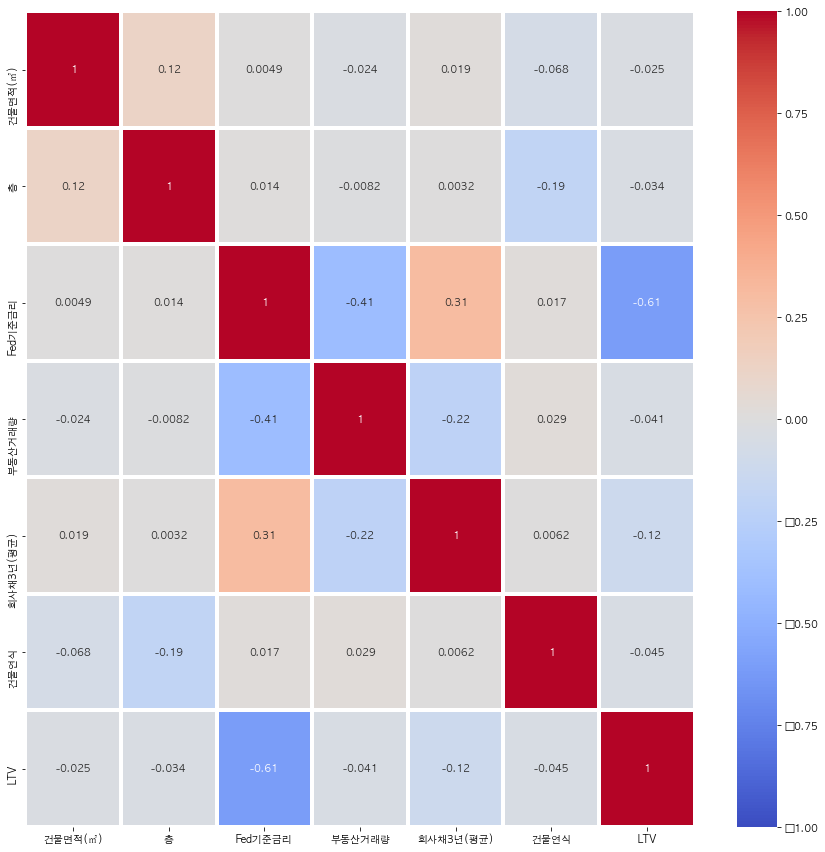

In [38]:
plot_cor(X_scaled)

# LinearRegression

## CV - R2, MSE

In [39]:
# X_test 컬럼 -> X_scaled 기준(train)으로 맞추기  
X_test_scaled=X_test_scaled[X_scaled.columns]

## 교차검증

In [40]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(model, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.50035,           Validation Score_r2 = 0.44797
      Train Score_mse = 0.03457,           Validation Score_mse = 0.03031


Fold 2: Train Score_r2 = 0.51719,           Validation Score_r2 = 0.42584
      Train Score_mse = 0.03398,           Validation Score_mse = 0.03247


Fold 3: Train Score_r2 = 0.52385,           Validation Score_r2 = 0.42981
      Train Score_mse = 0.0334,           Validation Score_mse = 0.03474


Fold 4: Train Score_r2 = 0.52947,           Validation Score_r2 = 0.35496
      Train Score_mse = 0.03078,           Validation Score_mse = 0.0488


Fold 5: Train Score_r2 = 0.486,           Validation Score_r2 = 0.18674
      Train Score_mse = 0.03344,           Validation Score_mse = 0.05751


CV 평균 R2 : 0.3691
CV 평균 MSE : 0.0408


## 평가지표 train and test 시각화

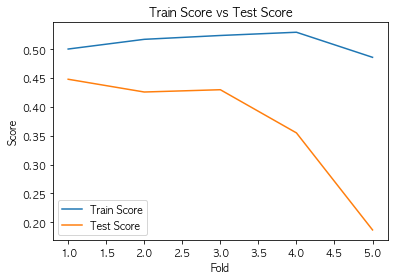

In [41]:
# R2
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

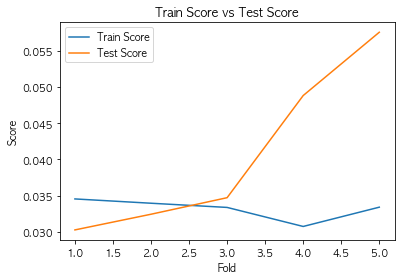

In [42]:
# MSE 
import matplotlib.pyplot as plt

train_scores = -cv_results['train_neg_mean_squared_error']
test_scores = -cv_results['test_neg_mean_squared_error']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

## Model 확정

- R2 그래프상 train & test 점수차이가 가장 적게 나는 모델 확정
- 최종 첫 번째로 확정

In [43]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.048, RMSE :  0.218, MAE: 0.218
Variance score :  0.611




In [44]:
# test 계수 결과 DF 

test_result = pd.DataFrame(data= cv_results['estimator'][0].coef_, index = X_scaled.columns)

test_result.columns = ['회귀계수']

test_result.sort_values('회귀계수', ascending=False)

,회귀계수
건물면적(㎡),2.199209
층,0.291385
부동산거래량,0.027903
회사채3년(평균),0.007940
건물연식,-0.009913
Fed기준금리,-0.161127
LTV,-0.252492


# Ridge & Lasso

## Ridge

/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/eunjin/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


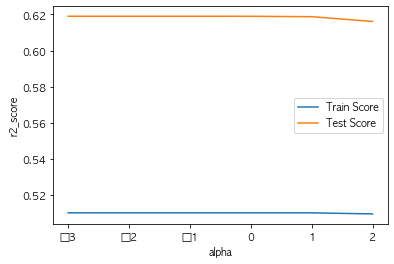

In [45]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)

import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, y_scaled)
    train_score.append(ridge.score(X_scaled, y_scaled))
    test_score.append(ridge.score(X_test_scaled, y_test_scaled))

plt.plot(np.log10(alpha_list), train_score, label='Train Score')
plt.plot(np.log10(alpha_list), test_score, label='Test Score')
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.legend()
plt.show()

- alpha 값이 변해도 큰 차이가 없어 기본값 alpha = 1.0으로 진행

## CV

In [46]:
# CV 

from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
# 교차 검증을 통해 모델 평가 및 추정기 반환
cv_results = cross_validate(ridge, X_scaled, y_scaled, 
                            scoring= ('r2', 'neg_mean_squared_error'),cv=5, 
                            return_train_score=True, return_estimator=True)

train_scores_r2 = cv_results['train_r2']  # 훈련 점수
test_scores_r2 = cv_results['test_r2']    # 검증 점수
train_scores_mse = -cv_results['train_neg_mean_squared_error']
test_scores_mse = -cv_results['test_neg_mean_squared_error'] 

Validation_R2_score_mean = 0
Validation_MSE_mean = 0

# 훈련 점수와 검증 점수 출력
for i in range(len(train_scores_r2)):
   print(f"Fold {i+1}: Train Score_r2 = {np.round(train_scores_r2[i],5)},\
           Validation Score_r2 = {np.round(test_scores_r2[i],5)}")
   print(f"      Train Score_mse = {np.round(train_scores_mse[i],5)},\
           Validation Score_mse = {np.round(test_scores_mse[i],5)}")
   print('\n')
       # 마지막 평균 반환용
   Validation_R2_score_mean += test_scores_r2[i]
   Validation_MSE_mean += test_scores_mse[i]


print(f'CV 평균 R2 : {np.round(Validation_R2_score_mean/5,4)}')
print(f'CV 평균 MSE : {np.round(Validation_MSE_mean/5,4)}')

Fold 1: Train Score_r2 = 0.50035,           Validation Score_r2 = 0.44798
      Train Score_mse = 0.03457,           Validation Score_mse = 0.03031


Fold 2: Train Score_r2 = 0.51719,           Validation Score_r2 = 0.42583
      Train Score_mse = 0.03398,           Validation Score_mse = 0.03247


Fold 3: Train Score_r2 = 0.52385,           Validation Score_r2 = 0.42983
      Train Score_mse = 0.0334,           Validation Score_mse = 0.03474


Fold 4: Train Score_r2 = 0.52947,           Validation Score_r2 = 0.35489
      Train Score_mse = 0.03078,           Validation Score_mse = 0.0488


Fold 5: Train Score_r2 = 0.486,           Validation Score_r2 = 0.18681
      Train Score_mse = 0.03344,           Validation Score_mse = 0.05751


CV 평균 R2 : 0.3691
CV 평균 MSE : 0.0408


## 평가지표 train and test 차이 시각화

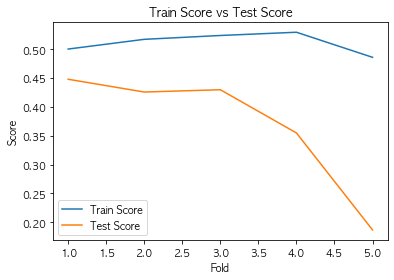

In [47]:
import matplotlib.pyplot as plt

train_scores = cv_results['train_r2']
test_scores = cv_results['test_r2']

# Fold 번호를 x축으로 설정하여 train_score와 test_score를 그래프로 출력
fold_numbers = range(1, len(train_scores) + 1)

plt.plot(fold_numbers, train_scores, label='Train Score')
plt.plot(fold_numbers, test_scores, label='Test Score')

plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Train Score vs Test Score')
plt.legend()
plt.show()

In [48]:
# ridge의 train, test r2 확인
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_scaled, y_scaled)
print(ridge.score(X_scaled, y_scaled))
print(ridge.score(X_test_scaled, y_test_scaled))

0.5100288724218514
0.6189779884831419


In [49]:
# 최종 모델 - Predict & 평가지표
# Train 전체로 학습 시
ridge.fit(X_scaled, y_scaled)
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.047, RMSE :  0.216, MAE: 0.216
Variance score :  0.619




In [50]:
# 최종 모델 - Predict & 평가지표

y_pred = cv_results['estimator'][0].predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_scaled,y_pred)
print('MSE : {0:.3f}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test_scaled, y_pred)))
print('\n')

MSE : 0.048, RMSE :  0.218, MAE: 0.218
Variance score :  0.611




In [51]:
# Ridge 회귀계수
ridge_df = pd.DataFrame(data = cv_results['estimator'][0].coef_, index = X_scaled.columns)
ridge_df.columns = ['회귀계수']
ridge_df.sort_values(by = '회귀계수',ascending=False)

,회귀계수
건물면적(㎡),2.198069
층,0.291376
부동산거래량,0.027895
회사채3년(평균),0.007948
건물연식,-0.009941
Fed기준금리,-0.161126
LTV,-0.252497


In [52]:
# Lasso 
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_scaled, y_scaled)
print(lasso.score(X_scaled, y_scaled))
print(lasso.score(X_test_scaled, y_test_scaled))

0.0
-0.12497822247614176


In [53]:
lasso.coef_ == 0

array([ True,  True,  True,  True,  True,  True,  True])

# 잔차항 검정 
1. 정규성
2. 등분산성
3. 독립성

In [54]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

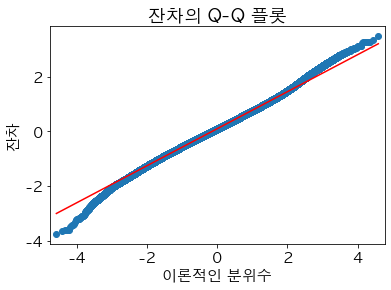

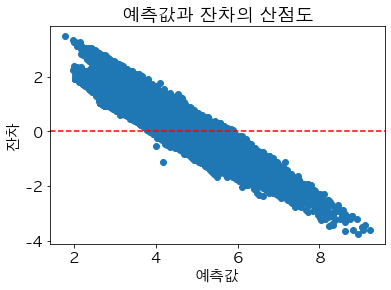

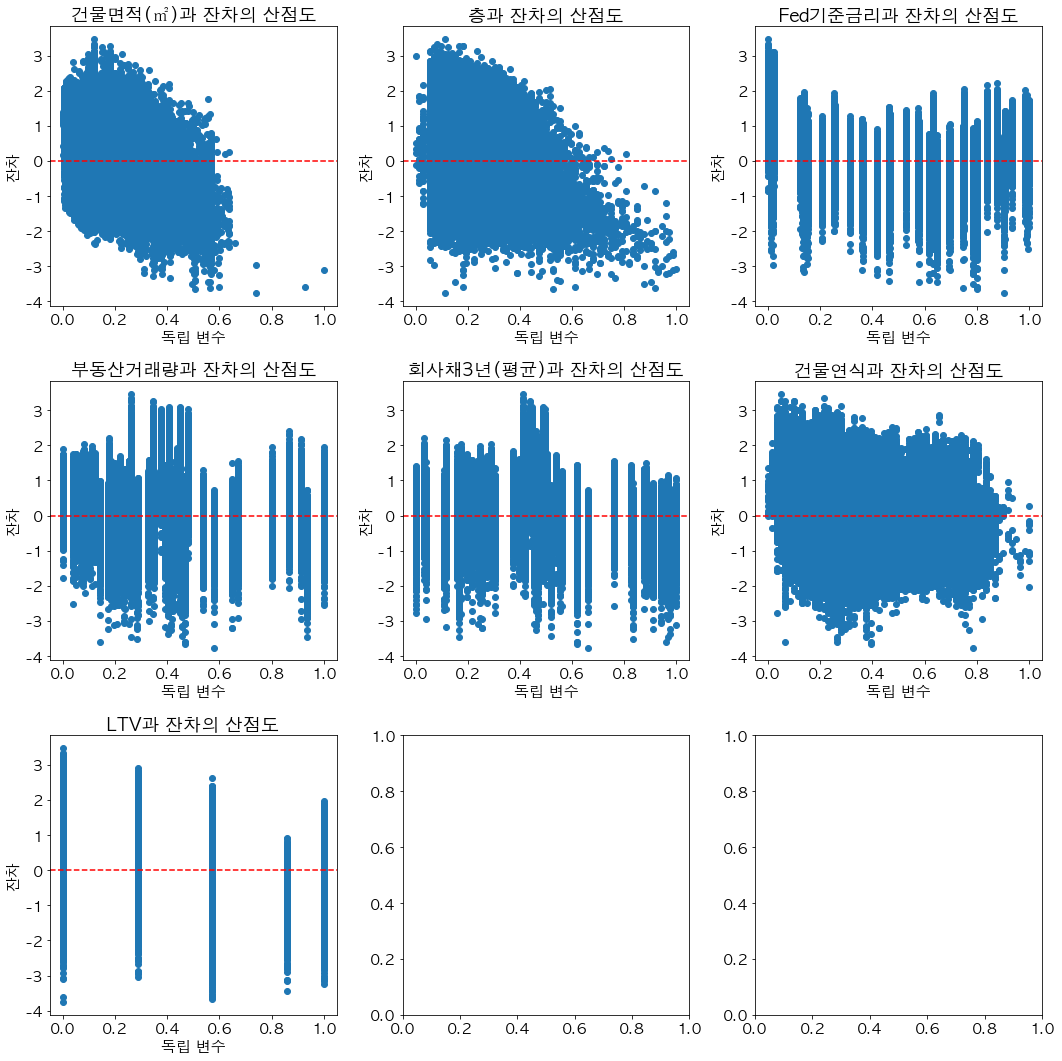

In [55]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

x = X_scaled
y = y_scaled

# 모델 적합
model = sm.OLS(y, x)  # 종속 변수 y와 독립 변수 X를 지정하여 모델 생성
result = model.fit()  # 모델 적합

# 잔차 추출
residuals = result.resid

# 잔차 분석
# 잔차의 정규성 확인: 잔차의 분포를 정규분포와 비교하여 정규성 검정을 수행합니다.
sm.qqplot(residuals, line='s')  # Q-Q plot을 그려서 정규성 확인
plt.xlabel('이론적인 분위수')
plt.ylabel('잔차')
plt.title('잔차의 Q-Q 플롯')
plt.show()

# 잔차의 등분산성 확인: 잔차와 예측값 사이의 관계를 살펴서 등분산성을 확인합니다.
plt.scatter(result.fittedvalues, residuals)
plt.xlabel('예측값')
plt.ylabel('잔차')
plt.title('예측값과 잔차의 산점도')
plt.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가
plt.show()

# 잔차의 독립성 확인: 잔차와 독립 변수 간의 관계를 살펴서 독립성을 확인합니다.
num_cols = len(x.columns)
num_rows = math.ceil(num_cols / 3)  # 3개의 열로 나누어 출력하고자 한다면
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))
for i in range(num_cols):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.scatter(x.iloc[:, i], residuals)
    ax.set_xlabel('독립 변수')
    ax.set_ylabel('잔차')
    ax.set_title(f'{x.columns[i]}과 잔차의 산점도')
    ax.axhline(y=0, color='red', linestyle='--')  # 잔차가 0인 기준선 추가

plt.tight_layout()  # 그래프 간격 조정
plt.show()